# Study Case Data Science Learning Studio

### New York City Taxi and Limousine Commission (TLC)

## Load Data

In [ ]:
!{sys.executable} -m pip install pyarrow

In [156]:
import sys
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import numpy as np

In [2]:
parquet_file = 'yellow_tripdata_2021-09.parquet'
df = pd.read_parquet(parquet_file)
csv_output = 'yellow_taxi_cab.csv'
df.to_csv(csv_output, index=False, sep='\t')

In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,16.00,0.50,0.5,2.00,0.00,0.3,21.80,2.5,0.0
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,6.00,0.50,0.5,1.96,0.00,0.3,11.76,2.5,0.0
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,6.00,0.50,0.5,1.96,0.00,0.3,11.76,2.5,0.0
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0,6.50,1.0,N,90,260,2,21.00,3.00,0.5,0.00,6.55,0.3,31.35,2.5,0.0
4,2,2021-09-01 00:44:54,2021-09-01 00:56:33,1.0,2.32,1.0,N,75,238,2,10.50,0.50,0.5,0.00,0.00,0.3,11.80,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963788,2,2021-09-30 23:09:00,2021-09-30 23:29:00,NaN,4.32,NaN,None,113,146,0,20.10,0.00,0.5,6.35,6.55,0.3,36.30,NaN,NaN
2963789,2,2021-09-30 23:39:01,2021-09-30 23:55:44,NaN,2.66,NaN,None,114,87,0,13.20,0.00,0.5,2.63,0.00,0.3,19.13,NaN,NaN
2963790,1,2021-09-30 23:46:16,2021-10-01 00:19:02,NaN,6.80,NaN,None,142,223,0,26.00,0.50,0.5,5.96,0.00,0.3,35.76,NaN,NaN
2963791,2,2021-09-30 23:29:00,2021-09-30 23:54:00,NaN,3.84,NaN,None,229,7,0,16.63,0.00,0.5,4.26,0.00,0.3,24.19,NaN,NaN


In [4]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

## Data Understanding

In [5]:
df.shape

(2963793, 19)

In [6]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.963793e+06,2.820939e+06,2.963793e+06,2.820939e+06,2.963793e+06,2.963793e+06,2.963793e+06,2.963793e+06,2.963793e+06,2.963793e+06,2.963793e+06,2.963793e+06,2.963793e+06,2.963793e+06,2.820939e+06,2.820939e+06
mean,1.719343e+00,1.423839e+00,6.583621e+00,1.117187e+00,1.642187e+02,1.619331e+02,1.180439e+00,1.445045e+01,1.042887e+00,4.923531e-01,2.499008e+00,4.386582e-01,2.973990e-01,2.086968e+01,2.295053e+00,7.829840e-02
std,5.327669e-01,1.025660e+00,6.567038e+02,2.477475e+00,6.635136e+01,7.073682e+01,5.247860e-01,4.754842e+02,1.251067e+00,7.620112e-02,2.934906e+00,1.912855e+00,3.901367e-02,4.755699e+02,7.168963e-01,3.047751e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.740000e+02,-5.500000e+00,-5.000000e-01,-9.860000e+01,-4.125000e+01,-3.000000e-01,-4.765500e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.100000e+00,1.000000e+00,1.250000e+02,1.120000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.200000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.900000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+01,5.000000e-01,5.000000e-01,2.060000e+00,0.000000e+00,3.000000e-01,1.580000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.490000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.600000e+01,2.500000e+00,5.000000e-01,3.200000e+00,0.000000e+00,3.000000e-01,2.230000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,3.171825e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.182834e+05,9.550000e+00,3.300000e+00,3.333300e+02,9.113000e+02,3.000000e-01,8.182867e+05,2.750000e+00,1.250000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963793 entries, 0 to 2963792
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [8]:
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          142854
trip_distance                 0
RatecodeID               142854
store_and_fwd_flag       142854
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     142854
airport_fee              142854
dtype: int64

<Figure size 432x288 with 0 Axes>

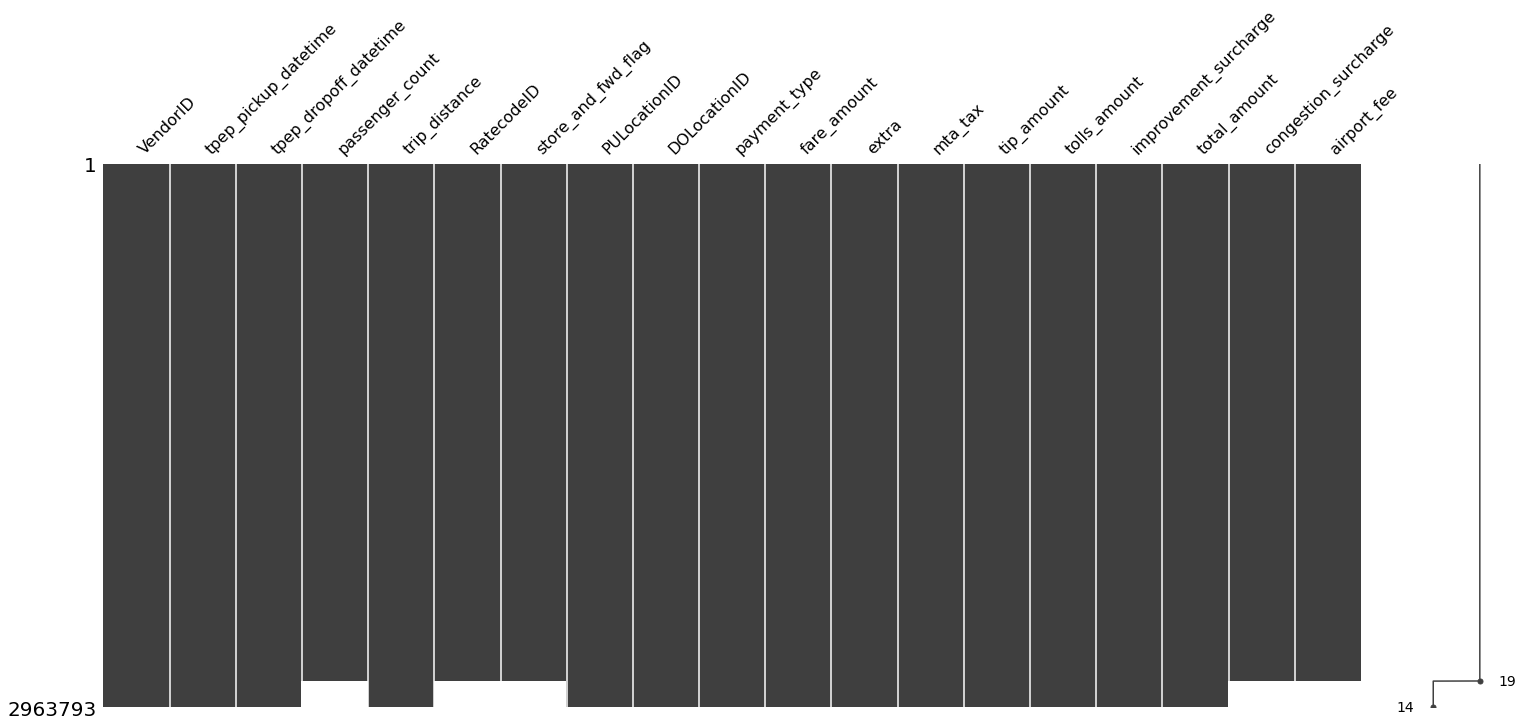

<Figure size 432x288 with 0 Axes>

In [9]:
msno.matrix(df)
plt.figure()

In [10]:
df.nunique()

VendorID                       4
tpep_pickup_datetime     1565270
tpep_dropoff_datetime    1564534
passenger_count               10
trip_distance               4794
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 261
DOLocationID                 260
payment_type                   5
fare_amount                 7729
extra                         60
mta_tax                       10
tip_amount                  3262
tolls_amount                 595
improvement_surcharge          3
total_amount               12543
congestion_surcharge           7
airport_fee                    3
dtype: int64

# Data Preparation

### Handling Missing Value

In [11]:
# Menangani missing value dengan menghapusnya
df = df.dropna()

<Figure size 432x288 with 0 Axes>

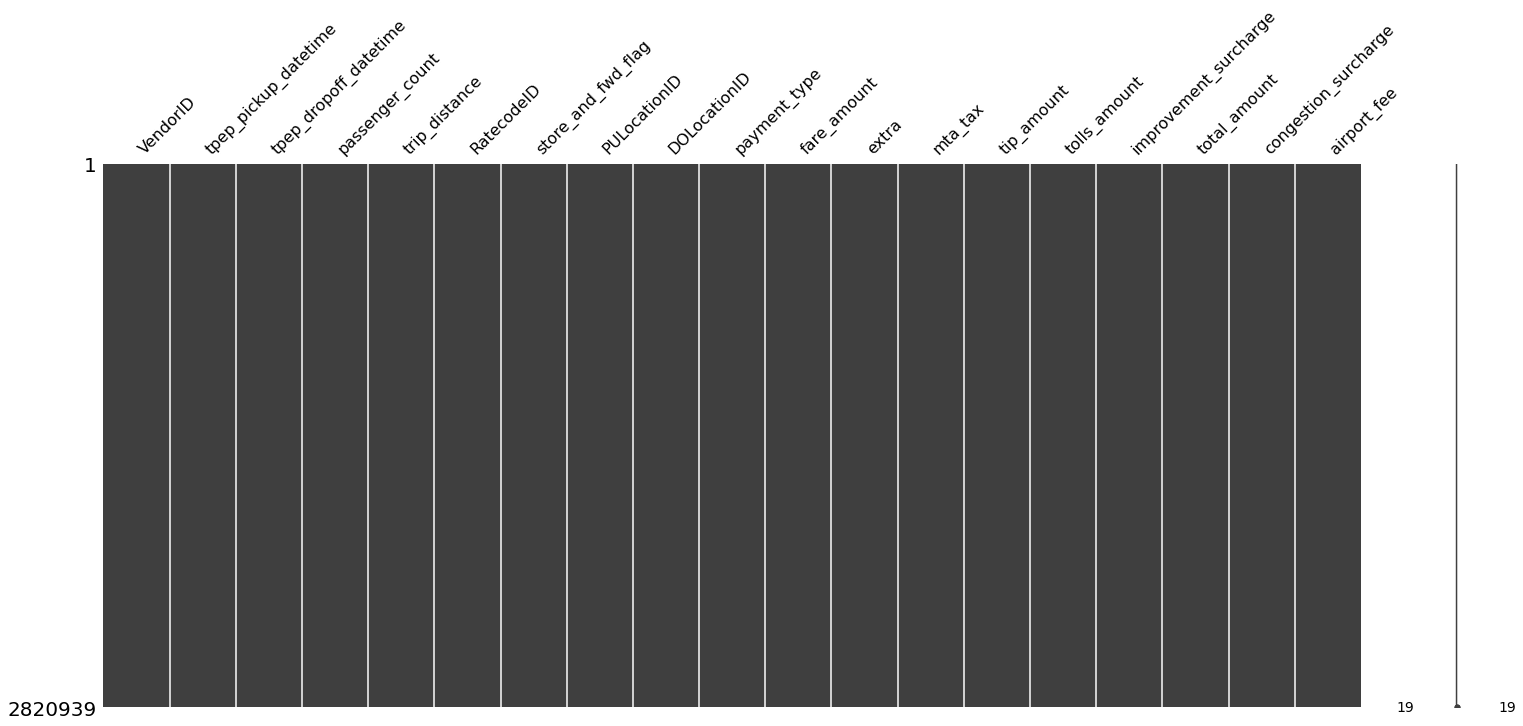

<Figure size 432x288 with 0 Axes>

In [12]:
msno.matrix(df)
plt.figure()

In [13]:
df.nunique()

VendorID                       2
tpep_pickup_datetime     1530338
tpep_dropoff_datetime    1529609
passenger_count               10
trip_distance               4643
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 260
DOLocationID                 260
payment_type                   4
fare_amount                 1801
extra                         44
mta_tax                       10
tip_amount                  3162
tolls_amount                 563
improvement_surcharge          3
total_amount               10200
congestion_surcharge           7
airport_fee                    3
dtype: int64

In [14]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,16.0,0.5,0.5,2.00,0.00,0.3,21.80,2.5,0.00
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.00
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.00
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0,6.50,1.0,N,90,260,2,21.0,3.0,0.5,0.00,6.55,0.3,31.35,2.5,0.00
4,2,2021-09-01 00:44:54,2021-09-01 00:56:33,1.0,2.32,1.0,N,75,238,2,10.5,0.5,0.5,0.00,0.00,0.3,11.80,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820934,2,2021-09-30 23:44:39,2021-09-30 23:52:10,1.0,1.14,1.0,N,113,79,1,7.0,0.5,0.5,2.16,0.00,0.3,12.96,2.5,0.00
2820935,2,2021-09-30 23:56:45,2021-10-01 00:16:34,1.0,4.80,1.0,N,79,43,1,17.0,0.5,0.5,2.20,0.00,0.3,23.00,2.5,0.00
2820936,2,2021-09-30 23:06:59,2021-09-30 23:13:38,3.0,0.83,1.0,N,79,4,1,6.0,0.5,0.5,1.96,0.00,0.3,11.76,2.5,0.00
2820937,2,2021-09-30 23:16:18,2021-09-30 23:38:27,1.0,4.07,1.0,N,79,17,1,18.0,0.5,0.5,4.36,0.00,0.3,26.16,2.5,0.00


### Creating Time Feature

In [15]:
df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name()

<ipython-input-15-d18dc7eea81d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
<ipython-input-15-d18dc7eea81d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name()


In [16]:
df['pickup_day_no']=df['tpep_pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['tpep_dropoff_datetime'].dt.weekday

<ipython-input-16-31cb02a25eca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_day_no']=df['tpep_pickup_datetime'].dt.weekday
<ipython-input-16-31cb02a25eca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropoff_day_no']=df['tpep_dropoff_datetime'].dt.weekday


In [17]:
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour

<ipython-input-17-6931078a1907>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
<ipython-input-17-6931078a1907>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour


In [18]:
df['pickup_month']=df['tpep_pickup_datetime'].dt.month
df['dropoff_month']=df['tpep_dropoff_datetime'].dt.month

<ipython-input-18-96d7b1821d19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_month']=df['tpep_pickup_datetime'].dt.month
<ipython-input-18-96d7b1821d19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropoff_month']=df['tpep_dropoff_datetime'].dt.month


In [19]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [20]:
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

<ipython-input-20-036b7c20a9b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
<ipython-input-20-036b7c20a9b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)


In [21]:
df['trip_duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

<ipython-input-21-2c05cde2f183>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']


In [22]:
df.columns
df.dtypes

VendorID                           int64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag                object
PULocationID                       int64
DOLocationID                       int64
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
airport_fee                      float64
pickup_day                        object
dropoff_day                       object
pickup_day_no                      int64
dropoff_day_no                     int64
pickup_hour                        int64
dropoff_hour    

In [23]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,...,Wednesday,2,2,6,6,9,9,Morning,Morning,0 days 00:10:54
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,...,Wednesday,2,2,6,6,9,9,Morning,Morning,0 days 00:06:08
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,...,Wednesday,2,2,6,6,9,9,Morning,Morning,0 days 00:04:15
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0,6.50,1.0,N,90,260,2,...,Wednesday,2,2,0,0,9,9,Late night,Late night,0 days 00:18:19
4,2,2021-09-01 00:44:54,2021-09-01 00:56:33,1.0,2.32,1.0,N,75,238,2,...,Wednesday,2,2,0,0,9,9,Late night,Late night,0 days 00:11:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820934,2,2021-09-30 23:44:39,2021-09-30 23:52:10,1.0,1.14,1.0,N,113,79,1,...,Thursday,3,3,23,23,9,9,Late night,Late night,0 days 00:07:31
2820935,2,2021-09-30 23:56:45,2021-10-01 00:16:34,1.0,4.80,1.0,N,79,43,1,...,Friday,3,4,23,0,9,10,Late night,Late night,0 days 00:19:49
2820936,2,2021-09-30 23:06:59,2021-09-30 23:13:38,3.0,0.83,1.0,N,79,4,1,...,Thursday,3,3,23,23,9,9,Late night,Late night,0 days 00:06:39
2820937,2,2021-09-30 23:16:18,2021-09-30 23:38:27,1.0,4.07,1.0,N,79,17,1,...,Thursday,3,3,23,23,9,9,Late night,Late night,0 days 00:22:09


### Creating Location Feature

In [24]:
# Location Mapping
Bronx = [199,168,126,213,208,159,147,167,46,58,183,247,69,119,250,212,248,182,242,60,78,59,
         47,169,235,184,51,3,81,185,31,32,259,254,20,94,18,136,241,174,240,200,220]

Brooklyn = [154,150,210,29,55,108,21,123,149,155,11,22,67,14,178,165,91,39,222,76,77,63,35,72,71,85,89,26,227,228,111,
            133,257,190,188,62,61,177,225,37,26,80,112,255,256,17,217,49,97,181,189,33,34,65,66,25,40,106,52,54,195]

Manhattan = [103,104,105,12,87,88,13,261,45,209,232,231,125,211,144,148,4,79,113,114,249,158,224,107,234,90,68,246,
             137,186,164,170,100,233,50,48,230,161,163,162,229,202,140,141,237,236,262,263,142,143,239,43,238,151,24,
             75,74,194,41,166,42,152,116,244,120,243,127,128,153]

Queens =[27,201,117,86,2,30,124,132,219,203,180,216,10,218,139,258,197,215,205,38,191,122,130,64,101,19,131,28,134,96,
        102,198,175,16,9,98,15,252,53,171,73,192,121,135,92,253,93,95,196,160,157,56,57,82,173,83,70,138,129,207,226,
        260,223,7,8,179,145,146,193]

Staten_Island =[44,204,5,84,99,109,110,172,176,23,118,214,6,221,115,251,206,245,156,187]

def LocIdtoBoroughs(x):
    if x in Bronx:
        return 'Bronx'
    elif x in Brooklyn:
        return 'Brooklyn'
    elif x in Manhattan:
        return 'Manhattan'
    elif x in Queens:
        return 'Queens'
    else:
        return 'Staten Island'

df['pickup_loc']=df['PULocationID'].apply(LocIdtoBoroughs)
df['dropoff_loc']=df['DOLocationID'].apply(LocIdtoBoroughs)

<ipython-input-24-cfebe8cc5f5e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_loc']=df['PULocationID'].apply(LocIdtoBoroughs)
<ipython-input-24-cfebe8cc5f5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dropoff_loc']=df['DOLocationID'].apply(LocIdtoBoroughs)


In [25]:
len(Queens)

69

In [26]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration,pickup_loc,dropoff_loc
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,...,2,6,6,9,9,Morning,Morning,0 days 00:10:54,Manhattan,Manhattan
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,...,2,6,6,9,9,Morning,Morning,0 days 00:06:08,Manhattan,Manhattan
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,...,2,6,6,9,9,Morning,Morning,0 days 00:04:15,Manhattan,Manhattan
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0,6.50,1.0,N,90,260,2,...,2,0,0,9,9,Late night,Late night,0 days 00:18:19,Manhattan,Queens
4,2,2021-09-01 00:44:54,2021-09-01 00:56:33,1.0,2.32,1.0,N,75,238,2,...,2,0,0,9,9,Late night,Late night,0 days 00:11:39,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820934,2,2021-09-30 23:44:39,2021-09-30 23:52:10,1.0,1.14,1.0,N,113,79,1,...,3,23,23,9,9,Late night,Late night,0 days 00:07:31,Manhattan,Manhattan
2820935,2,2021-09-30 23:56:45,2021-10-01 00:16:34,1.0,4.80,1.0,N,79,43,1,...,4,23,0,9,10,Late night,Late night,0 days 00:19:49,Manhattan,Manhattan
2820936,2,2021-09-30 23:06:59,2021-09-30 23:13:38,3.0,0.83,1.0,N,79,4,1,...,3,23,23,9,9,Late night,Late night,0 days 00:06:39,Manhattan,Manhattan
2820937,2,2021-09-30 23:16:18,2021-09-30 23:38:27,1.0,4.07,1.0,N,79,17,1,...,3,23,23,9,9,Late night,Late night,0 days 00:22:09,Manhattan,Brooklyn


In [27]:
col_2 = ['pickup_loc', 'dropoff_loc']

for i in col_2:
    print('Column {} has {} unique values'.format(i,df[i].nunique()))
    print(df[i].unique())
    print('---------------------------------------------------')

Column pickup_loc has 5 unique values
['Manhattan' 'Queens' 'Brooklyn' 'Staten Island' 'Bronx']
---------------------------------------------------
Column dropoff_loc has 5 unique values
['Manhattan' 'Queens' 'Brooklyn' 'Bronx' 'Staten Island']
---------------------------------------------------


In [28]:
df['trip_duration'].sort_values(ascending=False)

80157       5 days 21:50:52
80156       5 days 21:10:21
78435       5 days 15:48:45
1776439     3 days 23:39:40
76245       2 days 00:41:06
                 ...       
60975       0 days 00:00:00
505175      0 days 00:00:00
1305510     0 days 00:00:00
2166049   -1 days +23:58:50
1288646   -1 days +23:55:47
Name: trip_duration, Length: 2820939, dtype: timedelta64[ns]

In [29]:
df['trip_duration_1'] = df['trip_duration'] / pd.Timedelta(hours=1)

<ipython-input-29-c7b367ecf1b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_duration_1'] = df['trip_duration'] / pd.Timedelta(hours=1)


In [30]:
df['trip_duration_1'].sort_values(ascending=False)

80157      141.847778
80156      141.172500
78435      135.812500
1776439     95.661111
76245       48.685000
              ...    
60975        0.000000
505175       0.000000
1305510      0.000000
2166049     -0.019444
1288646     -0.070278
Name: trip_duration_1, Length: 2820939, dtype: float64

In [31]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration,pickup_loc,dropoff_loc,trip_duration_1
0,2,2021-09-01 06:04:34,2021-09-01 06:15:28,2.0,4.90,1.0,N,87,229,1,...,6,6,9,9,Morning,Morning,0 days 00:10:54,Manhattan,Manhattan,0.181667
1,2,2021-09-01 06:26:31,2021-09-01 06:32:39,1.0,1.13,1.0,N,162,229,1,...,6,6,9,9,Morning,Morning,0 days 00:06:08,Manhattan,Manhattan,0.102222
2,2,2021-09-01 06:36:15,2021-09-01 06:40:30,2.0,1.37,1.0,N,141,262,1,...,6,6,9,9,Morning,Morning,0 days 00:04:15,Manhattan,Manhattan,0.070833
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0,6.50,1.0,N,90,260,2,...,0,0,9,9,Late night,Late night,0 days 00:18:19,Manhattan,Queens,0.305278
4,2,2021-09-01 00:44:54,2021-09-01 00:56:33,1.0,2.32,1.0,N,75,238,2,...,0,0,9,9,Late night,Late night,0 days 00:11:39,Manhattan,Manhattan,0.194167


### Handling Anomaly Value

### TLC Regulations:
- According to TLC regulations the maximum allowed trip duration in a 24 hour interval is 12 hours.
- This means the maximum allowed work hours for a driver is 12 hours
- There are 24k trips which either violate this rule or have trip durations of 0 or less than zero(Weird)

### Assumption
- Maximum passenger is 4 (four) passengers
- Minimum fare amount is 2.5 USD
- Minimum trip_duration is 15 minutes or 0.25 hour

In [32]:
col = ['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 'mta_tax', 'improvement_surcharge', 
       'congestion_surcharge', 'airport_fee']

for i in col:
    print('Column {} has {} unique values'.format(i,df[i].nunique()))
    print(df[i].unique())
    print('---------------------------------------------------')

Column VendorID has 2 unique values
[2 1]
---------------------------------------------------
Column passenger_count has 10 unique values
[2. 1. 5. 0. 3. 4. 6. 7. 8. 9.]
---------------------------------------------------
Column RatecodeID has 7 unique values
[ 1.  2.  5.  4.  3. 99.  6.]
---------------------------------------------------
Column store_and_fwd_flag has 2 unique values
['N' 'Y']
---------------------------------------------------
Column payment_type has 4 unique values
[1 2 3 4]
---------------------------------------------------
Column mta_tax has 10 unique values
[ 0.5   0.   -0.5   0.25 -0.25  0.08  2.5   1.55  3.3   0.32]
---------------------------------------------------
Column improvement_surcharge has 3 unique values
[ 0.3 -0.3  0. ]
---------------------------------------------------
Column congestion_surcharge has 7 unique values
[ 2.5   0.   -2.5   0.75 -0.75  2.75  1.  ]
---------------------------------------------------
Column airport_fee has 3 unique valu

In [33]:
# Hapus mta_tax < 0
df[df.mta_tax < 0].count()

VendorID                 12039
tpep_pickup_datetime     12039
tpep_dropoff_datetime    12039
passenger_count          12039
trip_distance            12039
RatecodeID               12039
store_and_fwd_flag       12039
PULocationID             12039
DOLocationID             12039
payment_type             12039
fare_amount              12039
extra                    12039
mta_tax                  12039
tip_amount               12039
tolls_amount             12039
improvement_surcharge    12039
total_amount             12039
congestion_surcharge     12039
airport_fee              12039
pickup_day               12039
dropoff_day              12039
pickup_day_no            12039
dropoff_day_no           12039
pickup_hour              12039
dropoff_hour             12039
pickup_month             12039
dropoff_month            12039
pickup_timeofday         12039
dropoff_timeofday        12039
trip_duration            12039
pickup_loc               12039
dropoff_loc              12039
trip_dur

In [34]:
indexmta0 = df[df.mta_tax < 0].index
df.drop(indexmta0, inplace=True)
df.mta_tax.unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([0.5 , 0.  , 0.25, 0.08, 2.5 , 1.55, 3.3 , 0.32])

In [35]:
# Hapus improvement_surcharge < 0
df[df.improvement_surcharge < 0].count()

VendorID                 294
tpep_pickup_datetime     294
tpep_dropoff_datetime    294
passenger_count          294
trip_distance            294
RatecodeID               294
store_and_fwd_flag       294
PULocationID             294
DOLocationID             294
payment_type             294
fare_amount              294
extra                    294
mta_tax                  294
tip_amount               294
tolls_amount             294
improvement_surcharge    294
total_amount             294
congestion_surcharge     294
airport_fee              294
pickup_day               294
dropoff_day              294
pickup_day_no            294
dropoff_day_no           294
pickup_hour              294
dropoff_hour             294
pickup_month             294
dropoff_month            294
pickup_timeofday         294
dropoff_timeofday        294
trip_duration            294
pickup_loc               294
dropoff_loc              294
trip_duration_1          294
dtype: int64

In [36]:
indexis0 = df[df.improvement_surcharge < 0].index
df.drop(indexis0, inplace=True)
df.improvement_surcharge.unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([0.3, 0. ])

In [37]:
# Hapus congestion_surcharge < 0
df[df.congestion_surcharge < 0].count()

VendorID                 2
tpep_pickup_datetime     2
tpep_dropoff_datetime    2
passenger_count          2
trip_distance            2
RatecodeID               2
store_and_fwd_flag       2
PULocationID             2
DOLocationID             2
payment_type             2
fare_amount              2
extra                    2
mta_tax                  2
tip_amount               2
tolls_amount             2
improvement_surcharge    2
total_amount             2
congestion_surcharge     2
airport_fee              2
pickup_day               2
dropoff_day              2
pickup_day_no            2
dropoff_day_no           2
pickup_hour              2
dropoff_hour             2
pickup_month             2
dropoff_month            2
pickup_timeofday         2
dropoff_timeofday        2
trip_duration            2
pickup_loc               2
dropoff_loc              2
trip_duration_1          2
dtype: int64

In [38]:
indexcs0 = df[df.congestion_surcharge < 0].index
df.drop(indexcs0, inplace=True)
df.congestion_surcharge.unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([2.5 , 0.  , 0.75, 2.75, 1.  ])

In [39]:
# Hapus airport_fee < 0
df[df.airport_fee < 0].count()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
pickup_day               0
dropoff_day              0
pickup_day_no            0
dropoff_day_no           0
pickup_hour              0
dropoff_hour             0
pickup_month             0
dropoff_month            0
pickup_timeofday         0
dropoff_timeofday        0
trip_duration            0
pickup_loc               0
dropoff_loc              0
trip_duration_1          0
dtype: int64

In [40]:
# Hapus RateCodeID = 99
df[df.RatecodeID == 99].count()

VendorID                 1766
tpep_pickup_datetime     1766
tpep_dropoff_datetime    1766
passenger_count          1766
trip_distance            1766
RatecodeID               1766
store_and_fwd_flag       1766
PULocationID             1766
DOLocationID             1766
payment_type             1766
fare_amount              1766
extra                    1766
mta_tax                  1766
tip_amount               1766
tolls_amount             1766
improvement_surcharge    1766
total_amount             1766
congestion_surcharge     1766
airport_fee              1766
pickup_day               1766
dropoff_day              1766
pickup_day_no            1766
dropoff_day_no           1766
pickup_hour              1766
dropoff_hour             1766
pickup_month             1766
dropoff_month            1766
pickup_timeofday         1766
dropoff_timeofday        1766
trip_duration            1766
pickup_loc               1766
dropoff_loc              1766
trip_duration_1          1766
dtype: int

In [41]:
index99 = df[df['RatecodeID']==99].index
df.drop(index99 , inplace=True)
df['RatecodeID'].unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array([1., 2., 5., 4., 3., 6.])

In [42]:
df[df.trip_duration_1 > 12].count()

VendorID                 4787
tpep_pickup_datetime     4787
tpep_dropoff_datetime    4787
passenger_count          4787
trip_distance            4787
RatecodeID               4787
store_and_fwd_flag       4787
PULocationID             4787
DOLocationID             4787
payment_type             4787
fare_amount              4787
extra                    4787
mta_tax                  4787
tip_amount               4787
tolls_amount             4787
improvement_surcharge    4787
total_amount             4787
congestion_surcharge     4787
airport_fee              4787
pickup_day               4787
dropoff_day              4787
pickup_day_no            4787
dropoff_day_no           4787
pickup_hour              4787
dropoff_hour             4787
pickup_month             4787
dropoff_month            4787
pickup_timeofday         4787
dropoff_timeofday        4787
trip_duration            4787
pickup_loc               4787
dropoff_loc              4787
trip_duration_1          4787
dtype: int

In [43]:
# Drop Duration > 12 hour
index12 = df[df.trip_duration_1 > 12].index
df.drop(index12 , inplace=True)
df['trip_duration_1'].sort_values(ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


1371381    11.979722
1272407    11.968056
431416     11.876389
2539332    11.860556
2636741    11.766667
             ...    
202472      0.000000
2446196     0.000000
959677      0.000000
2166049    -0.019444
1288646    -0.070278
Name: trip_duration_1, Length: 2802051, dtype: float64

In [44]:
# Drop Duration < 0 hour
index_0 = df[df.trip_duration_1 < 0].index
df.drop(index_0 , inplace=True)
df['trip_duration_1'].sort_values(ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


1371381    11.979722
1272407    11.968056
431416     11.876389
2539332    11.860556
2636741    11.766667
             ...    
865250      0.000000
3474        0.000000
2421067     0.000000
279499      0.000000
1572800     0.000000
Name: trip_duration_1, Length: 2802049, dtype: float64

In [45]:
df['fare_amount'].sort_values(ascending=False)

394006     818283.44
2265336       695.00
1202675       655.35
670797        554.00
1637127       550.00
             ...    
1052477         0.00
2055028         0.00
377407          0.00
377408          0.00
2174108       -60.00
Name: fare_amount, Length: 2802049, dtype: float64

In [46]:
df[df['fare_amount']<0].count()

VendorID                 1
tpep_pickup_datetime     1
tpep_dropoff_datetime    1
passenger_count          1
trip_distance            1
RatecodeID               1
store_and_fwd_flag       1
PULocationID             1
DOLocationID             1
payment_type             1
fare_amount              1
extra                    1
mta_tax                  1
tip_amount               1
tolls_amount             1
improvement_surcharge    1
total_amount             1
congestion_surcharge     1
airport_fee              1
pickup_day               1
dropoff_day              1
pickup_day_no            1
dropoff_day_no           1
pickup_hour              1
dropoff_hour             1
pickup_month             1
dropoff_month            1
pickup_timeofday         1
dropoff_timeofday        1
trip_duration            1
pickup_loc               1
dropoff_loc              1
trip_duration_1          1
dtype: int64

In [47]:
# Drop fare_amount < 0 hour
index_fare = df[df['fare_amount']<0].index
df.drop(index_fare , inplace=True)
df['fare_amount'].sort_values(ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


394006     818283.44
2265336       695.00
1202675       655.35
670797        554.00
1637127       550.00
             ...    
1659864         0.00
144420          0.00
1354209         0.00
1675492         0.00
977838          0.00
Name: fare_amount, Length: 2802048, dtype: float64

In [48]:
df['trip_distance'].sort_values(ascending=False)

1640562    791.54
2380491    747.30
28415      601.30
2375151    582.70
436045     543.00
            ...  
92667        0.00
248883       0.00
703285       0.00
1364587      0.00
426011       0.00
Name: trip_distance, Length: 2802048, dtype: float64

In [49]:
# Hapus nilai fare amount sangat besar
index_new = df[df['fare_amount']==818283.44].index
df.drop(index_new , inplace=True)
df['fare_amount'].sort_values()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2641436      0.00
1215240      0.00
1021828      0.00
1021829      0.00
1170269      0.00
            ...  
802611     529.50
1637127    550.00
670797     554.00
1202675    655.35
2265336    695.00
Name: fare_amount, Length: 2802047, dtype: float64

In [50]:
# Hapus fare amount < 2.5
index_fare10 = df[df['fare_amount']<2.5].index
df.drop(index_fare10 , inplace=True)
df['fare_amount'].sort_values()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


631690       2.50
2577652      2.50
260882       2.50
260881       2.50
260880       2.50
            ...  
802611     529.50
1637127    550.00
670797     554.00
1202675    655.35
2265336    695.00
Name: fare_amount, Length: 2800553, dtype: float64

In [51]:
# Hapus trip duration < 0.25
index_dur0 = df[df['trip_duration_1']<0.25].index
df.drop(index_dur0 , inplace=True)
df['trip_duration_1'].sort_values()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


194254      0.250000
1076993     0.250000
560639      0.250000
2333686     0.250000
1077842     0.250000
             ...    
2636741    11.766667
2539332    11.860556
431416     11.876389
1272407    11.968056
1371381    11.979722
Name: trip_duration_1, Length: 997946, dtype: float64

In [52]:
# Hapus trip distance = 0
index_dist0 = df[df['trip_distance']==0].index
df.drop(index_dist0 , inplace=True)
df['trip_distance'].sort_values()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


183198       0.01
224576       0.01
2303770      0.01
2799020      0.01
78594        0.01
            ...  
1677793    515.20
436045     543.00
2375151    582.70
28415      601.30
2380491    747.30
Name: trip_distance, Length: 984888, dtype: float64

In [53]:
# Hapus passenger_count > 4
df[df['passenger_count']>4].count()

VendorID                 38885
tpep_pickup_datetime     38885
tpep_dropoff_datetime    38885
passenger_count          38885
trip_distance            38885
RatecodeID               38885
store_and_fwd_flag       38885
PULocationID             38885
DOLocationID             38885
payment_type             38885
fare_amount              38885
extra                    38885
mta_tax                  38885
tip_amount               38885
tolls_amount             38885
improvement_surcharge    38885
total_amount             38885
congestion_surcharge     38885
airport_fee              38885
pickup_day               38885
dropoff_day              38885
pickup_day_no            38885
dropoff_day_no           38885
pickup_hour              38885
dropoff_hour             38885
pickup_month             38885
dropoff_month            38885
pickup_timeofday         38885
dropoff_timeofday        38885
trip_duration            38885
pickup_loc               38885
dropoff_loc              38885
trip_dur

In [54]:
index_pass4 = df[df['passenger_count']>4].index
df.drop(index_pass4 , inplace=True)
df['passenger_count'].sort_values()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2060022    0.0
810430     0.0
1476079    0.0
810431     0.0
1476109    0.0
          ... 
178518     4.0
256925     4.0
178489     4.0
1923724    4.0
418063     4.0
Name: passenger_count, Length: 946003, dtype: float64

In [55]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,trip_duration,pickup_loc,dropoff_loc,trip_duration_1
3,1,2021-09-01 00:00:15,2021-09-01 00:18:34,2.0,6.50,1.0,N,90,260,2,...,0,0,9,9,Late night,Late night,0 days 00:18:19,Manhattan,Queens,0.305278
6,1,2021-09-01 00:35:36,2021-09-01 00:57:56,1.0,7.60,1.0,N,137,42,1,...,0,0,9,9,Late night,Late night,0 days 00:22:20,Manhattan,Manhattan,0.372222
8,1,2021-09-01 00:21:51,2021-09-01 00:49:19,1.0,11.20,1.0,N,93,113,1,...,0,0,9,9,Late night,Late night,0 days 00:27:28,Queens,Manhattan,0.457778
9,2,2021-09-01 00:38:43,2021-09-01 01:01:29,1.0,5.53,1.0,N,90,49,2,...,0,1,9,9,Late night,Late night,0 days 00:22:46,Manhattan,Brooklyn,0.379444
10,2,2021-09-01 00:56:22,2021-09-01 01:21:37,1.0,6.14,1.0,N,181,149,1,...,0,1,9,9,Late night,Late night,0 days 00:25:15,Brooklyn,Brooklyn,0.420833


In [56]:
df.shape

(946003, 33)

In [57]:
df.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime','PULocationID','DOLocationID','trip_duration'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_day', 'dropoff_day',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday', 'pickup_loc', 'dropoff_loc', 'trip_duration_1'],
      dtype='object')

# EDA

### Korelasi antar Variabel

<AxesSubplot:>

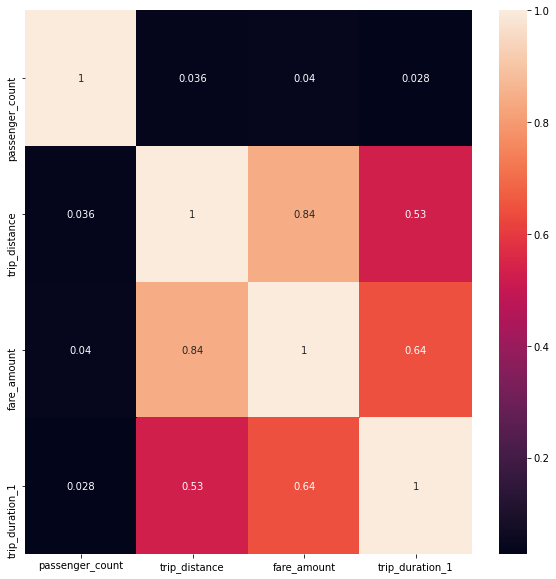

In [59]:
df_num = df[['passenger_count','trip_distance','fare_amount','trip_duration_1']]
plt.figure(figsize = (10,10))
sns.heatmap(df_num.corr(), annot = True)

###### Strong correlation between trip_distance, Trip_duration, and fare amount. So, we will focus on these features

### Time History Data Visualization

<ipython-input-60-f5f4cd8f490f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['pickup_day'] = df[['pickup_day_no']]
<ipython-input-60-f5f4cd8f490f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['dropoff_day'] = df[['dropoff_day_no']]
<ipython-input-60-f5f4cd8f490f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

Monday -  morning:5261 , day:27579 , mid-day:47140 night:29127
Tuesday -  morning:3682 , day:32126 , mid-day:53620 night:32998
Wednesday -  morning:4920 , day:40001 , mid-day:69940 night:43648
Thursday -  morning:6258 , day:41711 , mid-day:76896 night:52918
Friday -  morning:7558 , day:31951 , mid-day:60335 night:49671
Saturday -  morning:13781 , day:16147 , mid-day:50731 night:47557
Sunday -  morning:13888 , day:14329 , mid-day:43190 night:29040


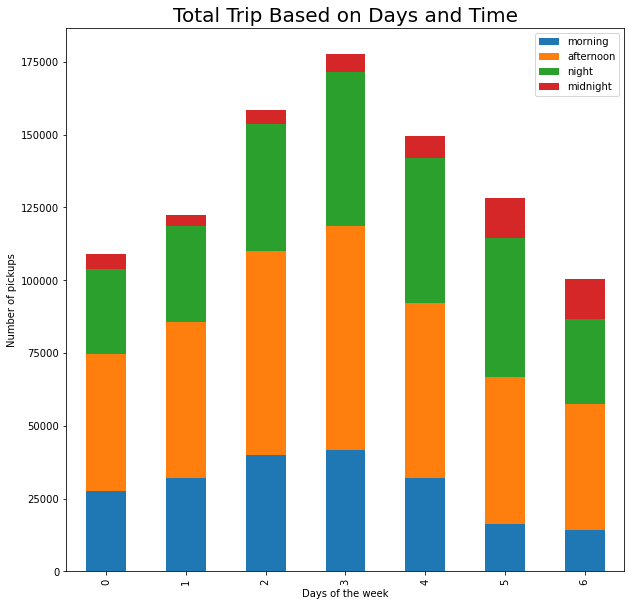

In [60]:
time = df[['pickup_hour','dropoff_hour']]
time['pickup_day'] = df[['pickup_day_no']]
time['dropoff_day'] = df[['dropoff_day_no']]
time['pickup_month'] = df[['pickup_month']]
time['dropoff_month'] = df[['dropoff_month']]

day_pickups = []
night_pickups = []
mid_night_pickups = []
afternoon_pickups = []

for i in range(0,7):
    day_pickups.append(time[(time.pickup_day == i) & (time.pickup_hour >= 6) & (time.pickup_hour < 12)].shape[0])
    night_pickups.append(time[(time.pickup_day == i) & (time.pickup_hour >= 18) & (time.pickup_hour <= 23)].shape[0])
    mid_night_pickups.append(time[(time.pickup_day == i) & (time.pickup_hour >= 0) & (time.pickup_hour < 6)].shape[0])
    afternoon_pickups.append(time[(time.pickup_day == i) & (time.pickup_hour >= 12) & (time.pickup_hour < 18)].shape[0])
    
days =pd.DataFrame({'morning':day_pickups, 'afternoon':afternoon_pickups, 'night':night_pickups, 'midnight':mid_night_pickups})
days

days.plot(kind='bar', stacked=True,figsize=(10, 10))
plt.title('Total Trip Based on Days and Time', fontsize = 20)
plt.xlabel('Days of the week')
plt.ylabel('Number of pickups')
plt.tick_params(axis='both', which='minor')
plt.plot()
#plt.xticks(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in range(0,len(days)):
    print ("{} -  morning:{} , day:{} , mid-day:{} night:{}".format(days[i],mid_night_pickups[i],day_pickups[i],afternoon_pickups[i],night_pickups[i]))

<AxesSubplot:title={'center':'Pickup Time Distribution'}, xlabel='pickup_timeofday', ylabel='count'>

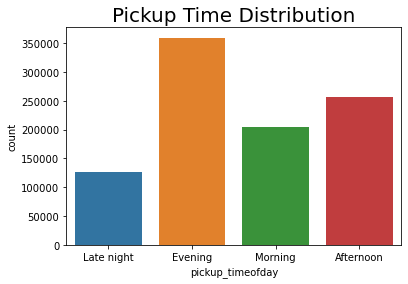

In [61]:
plt.title('Pickup Time Distribution',fontsize=20)
sns.countplot(x='pickup_timeofday', data=df)

<AxesSubplot:title={'center':'Dropoff Time Distribution'}, xlabel='dropoff_timeofday', ylabel='count'>

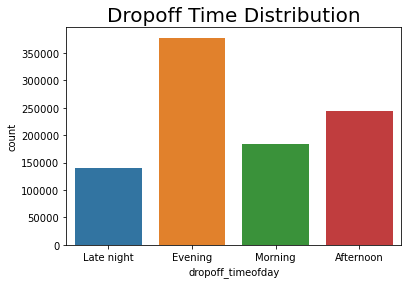

In [62]:
plt.title('Dropoff Time Distribution', fontsize=20)
sns.countplot(x='dropoff_timeofday', data=df)

### Pickup & Dropoff Location Distribution

<AxesSubplot:title={'center':'Pickup Location Distribution'}, xlabel='pickup_loc', ylabel='count'>

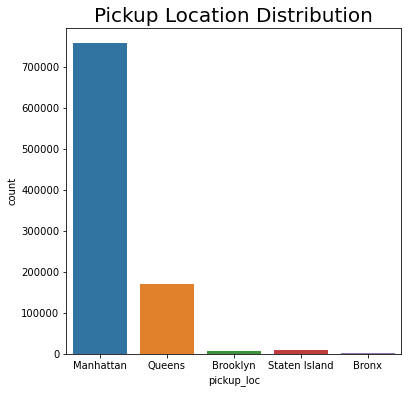

In [63]:
plt.figure(figsize = (6,6))
plt.title('Pickup Location Distribution',fontsize=20)
sns.countplot(x='pickup_loc', data=df)

<AxesSubplot:title={'center':'Dropoff Location Distribution'}, xlabel='dropoff_loc', ylabel='count'>

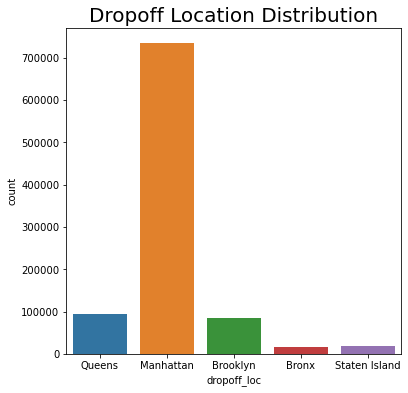

In [64]:
plt.figure(figsize = (6,6))
plt.title('Dropoff Location Distribution',fontsize=20)
sns.countplot(x='dropoff_loc', data=df)

##### There is imbalance location of trip order

### Fare Amount Analysis

<AxesSubplot:xlabel='pickup_loc', ylabel='fare_amount'>

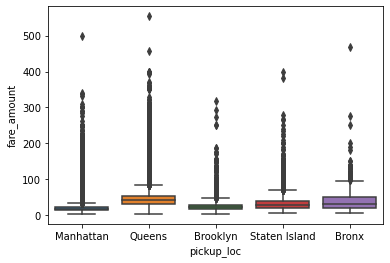

In [65]:
sns.boxplot(data=df, x='pickup_loc', y='fare_amount')

##### Too much outliers outside boxplot

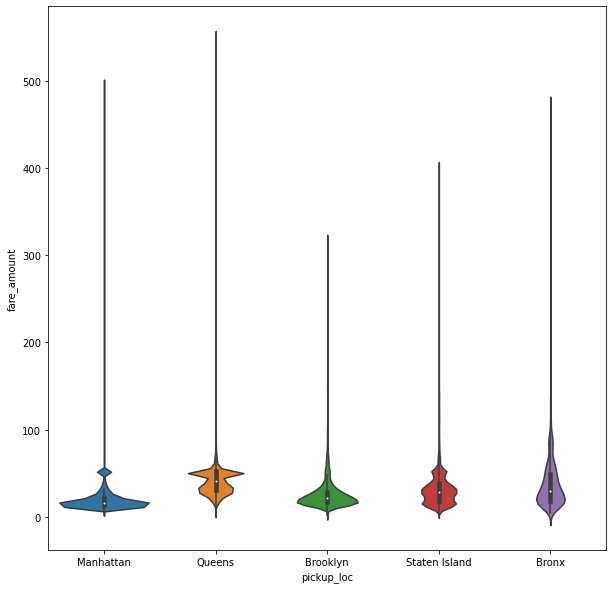

In [66]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(data=df, x='pickup_loc', y='fare_amount')
plt.show()

##### Too much outlier outside violinplot

<AxesSubplot:xlabel='pickup_loc', ylabel='fare_amount'>

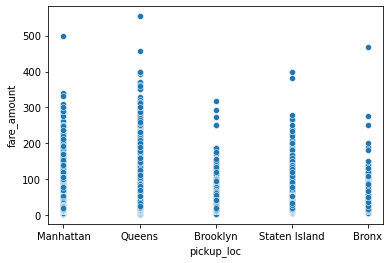

In [67]:
sns.scatterplot(data=df, x='pickup_loc', y='fare_amount')

<AxesSubplot:xlabel='trip_duration_1', ylabel='fare_amount'>

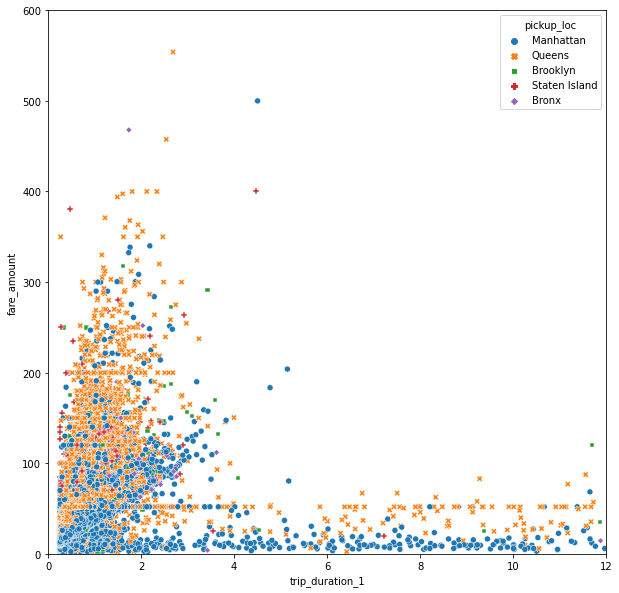

In [68]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0,12), ylim=(0,600))
sns.scatterplot(data=df, x='trip_duration_1', y='fare_amount', hue='pickup_loc', style='pickup_loc')

##### There are soo many anomaly data (small fare amount but long trip duration)

<AxesSubplot:xlabel='trip_duration_1', ylabel='trip_distance'>

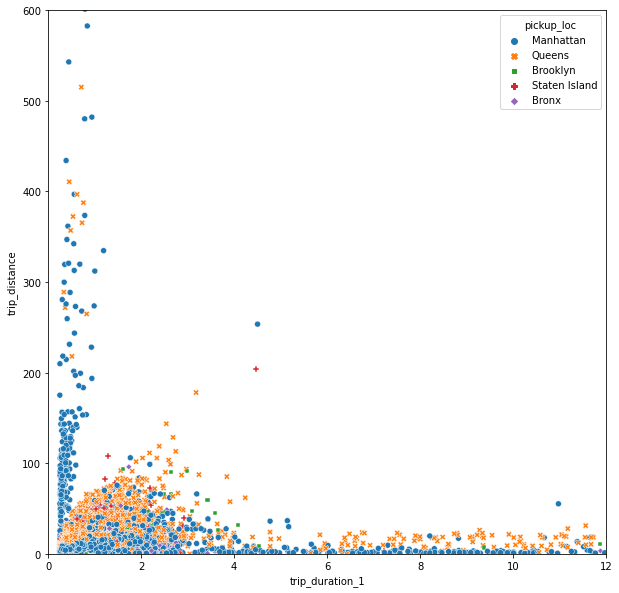

In [69]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0,12), ylim=(0,600))
sns.scatterplot(data=df, x='trip_duration_1', y='trip_distance', hue='pickup_loc', style='pickup_loc')

##### There are sooo many anomaly datas (long trip duration but short trip distance and quick trip duration but long trip distance)

<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

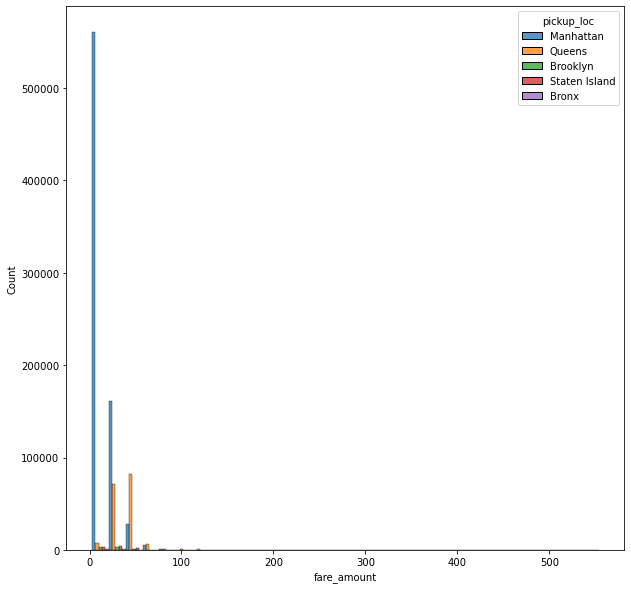

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=df, x="fare_amount", hue='pickup_loc', bins=30, multiple="dodge")

# Data Cleaning

### Clear Anomaly Data

In [71]:
df_new = df
df_new

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,...,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,pickup_loc,dropoff_loc,trip_duration_1
3,1,2.0,6.50,1.0,N,2,21.0,3.0,0.5,0.00,...,2,0,0,9,9,Late night,Late night,Manhattan,Queens,0.305278
6,1,1.0,7.60,1.0,N,1,25.5,3.0,0.5,5.85,...,2,0,0,9,9,Late night,Late night,Manhattan,Manhattan,0.372222
8,1,1.0,11.20,1.0,N,1,33.5,3.0,0.5,10.95,...,2,0,0,9,9,Late night,Late night,Queens,Manhattan,0.457778
9,2,1.0,5.53,1.0,N,2,20.5,0.5,0.5,0.00,...,2,0,1,9,9,Late night,Late night,Manhattan,Brooklyn,0.379444
10,2,1.0,6.14,1.0,N,1,21.5,0.5,0.5,4.56,...,2,0,1,9,9,Late night,Late night,Brooklyn,Brooklyn,0.420833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820911,1,1.0,6.50,1.0,N,2,22.5,3.0,0.5,0.00,...,4,23,0,9,10,Late night,Late night,Manhattan,Manhattan,0.424444
2820922,1,1.0,5.00,1.0,N,1,21.0,3.0,0.5,4.95,...,3,23,23,9,9,Late night,Late night,Manhattan,Brooklyn,0.470833
2820925,2,1.0,5.36,1.0,N,1,17.5,0.5,0.5,4.26,...,4,23,0,9,10,Late night,Late night,Manhattan,Manhattan,0.287778
2820935,2,1.0,4.80,1.0,N,1,17.0,0.5,0.5,2.20,...,4,23,0,9,10,Late night,Late night,Manhattan,Manhattan,0.330278


In [72]:
# Delete small fare amount but long trip duration
df_new[df_new.trip_duration_1 > 5].count()

VendorID                 240
passenger_count          240
trip_distance            240
RatecodeID               240
store_and_fwd_flag       240
payment_type             240
fare_amount              240
extra                    240
mta_tax                  240
tip_amount               240
tolls_amount             240
improvement_surcharge    240
total_amount             240
congestion_surcharge     240
airport_fee              240
pickup_day               240
dropoff_day              240
pickup_day_no            240
dropoff_day_no           240
pickup_hour              240
dropoff_hour             240
pickup_month             240
dropoff_month            240
pickup_timeofday         240
dropoff_timeofday        240
pickup_loc               240
dropoff_loc              240
trip_duration_1          240
dtype: int64

In [73]:
indextd5 = df_new[df_new.trip_duration_1 > 5].index
df_new.drop(indextd5, inplace=True)
df_new.trip_duration_1.sort_values()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


1870320    0.250000
1132752    0.250000
1633578    0.250000
1132782    0.250000
2557374    0.250000
             ...   
1515714    4.810000
394668     4.835278
397823     4.883889
544350     4.963889
71003      4.973889
Name: trip_duration_1, Length: 945763, dtype: float64

In [74]:
df_new[(df_new['trip_distance'] > 100) & (df_new['trip_duration_1'] < 2)]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,...,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,pickup_loc,dropoff_loc,trip_duration_1
6915,1,1.0,347.0,1.0,N,1,30.0,2.50,0.5,7.95,...,2,7,7,9,9,Morning,Morning,Manhattan,Queens,0.401944
14676,1,1.0,387.7,1.0,N,1,38.0,3.75,0.5,9.80,...,2,9,9,9,9,Morning,Morning,Queens,Manhattan,0.757222
28415,1,2.0,601.3,2.0,N,1,52.0,2.50,0.5,12.35,...,2,12,13,9,9,Afternoon,Afternoon,Manhattan,Queens,0.791389
38916,1,1.0,218.1,1.0,N,2,25.0,3.75,0.5,0.00,...,2,14,14,9,9,Afternoon,Afternoon,Queens,Manhattan,0.510000
90577,1,1.0,199.4,1.0,N,2,27.5,2.50,0.5,0.00,...,3,8,9,9,9,Morning,Morning,Manhattan,Manhattan,0.692222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2650869,1,1.0,108.8,1.0,N,1,17.5,2.50,0.5,4.15,...,2,14,14,9,9,Afternoon,Afternoon,Manhattan,Manhattan,0.420000
2757511,1,0.0,100.5,1.0,N,1,15.0,2.50,0.5,4.55,...,3,14,14,9,9,Afternoon,Afternoon,Manhattan,Manhattan,0.374444
2757512,1,1.0,135.9,1.0,N,2,21.0,2.50,0.5,0.00,...,3,14,15,9,9,Afternoon,Afternoon,Manhattan,Manhattan,0.525833
2771641,1,1.0,151.2,1.0,N,1,22.0,3.50,0.5,5.25,...,3,16,16,9,9,Evening,Evening,Manhattan,Manhattan,0.578056


In [75]:
indexxx = df_new[(df_new['trip_distance'] > 100) & (df_new['trip_duration_1'] < 2)].index
df_new.drop(indexxx, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [76]:
indexx = df_new[(df_new['trip_distance'] < 100) & (df_new['trip_distance'] > 40) & (df_new['trip_duration_1'] < 0.5) & 
                (df_new['pickup_loc'] == 'Manhattan')].index
df_new.drop(indexx, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [77]:
df_new

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,...,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,pickup_loc,dropoff_loc,trip_duration_1
3,1,2.0,6.50,1.0,N,2,21.0,3.0,0.5,0.00,...,2,0,0,9,9,Late night,Late night,Manhattan,Queens,0.305278
6,1,1.0,7.60,1.0,N,1,25.5,3.0,0.5,5.85,...,2,0,0,9,9,Late night,Late night,Manhattan,Manhattan,0.372222
8,1,1.0,11.20,1.0,N,1,33.5,3.0,0.5,10.95,...,2,0,0,9,9,Late night,Late night,Queens,Manhattan,0.457778
9,2,1.0,5.53,1.0,N,2,20.5,0.5,0.5,0.00,...,2,0,1,9,9,Late night,Late night,Manhattan,Brooklyn,0.379444
10,2,1.0,6.14,1.0,N,1,21.5,0.5,0.5,4.56,...,2,0,1,9,9,Late night,Late night,Brooklyn,Brooklyn,0.420833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820911,1,1.0,6.50,1.0,N,2,22.5,3.0,0.5,0.00,...,4,23,0,9,10,Late night,Late night,Manhattan,Manhattan,0.424444
2820922,1,1.0,5.00,1.0,N,1,21.0,3.0,0.5,4.95,...,3,23,23,9,9,Late night,Late night,Manhattan,Brooklyn,0.470833
2820925,2,1.0,5.36,1.0,N,1,17.5,0.5,0.5,4.26,...,4,23,0,9,10,Late night,Late night,Manhattan,Manhattan,0.287778
2820935,2,1.0,4.80,1.0,N,1,17.0,0.5,0.5,2.20,...,4,23,0,9,10,Late night,Late night,Manhattan,Manhattan,0.330278


# Data Visualization

### Correlation of Numerical Variable

<AxesSubplot:>

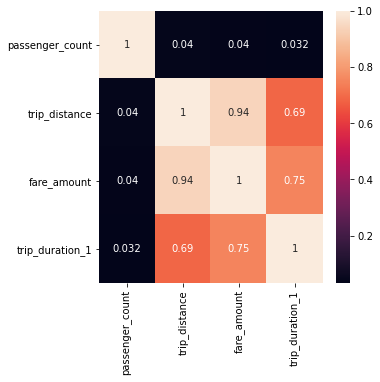

In [78]:
df_num_new = df_new[['passenger_count','trip_distance','fare_amount','trip_duration_1']]
plt.figure(figsize = (5,5))
sns.heatmap(df_num_new.corr(), annot = True)

### Time History Data Visualization

<ipython-input-79-0b9bee20a2ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['pickup_day'] = df_new[['pickup_day_no']]
<ipython-input-79-0b9bee20a2ab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['dropoff_day'] = df_new[['dropoff_day_no']]
<ipython-input-79-0b9bee20a2ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

Monday -  morning:5261 , day:27568 , mid-day:47095 night:29119
Tuesday -  morning:3681 , day:32108 , mid-day:53584 night:32996
Wednesday -  morning:4920 , day:39973 , mid-day:69883 night:43645
Thursday -  morning:6254 , day:41689 , mid-day:76846 night:52909
Friday -  morning:7558 , day:31936 , mid-day:60297 night:49667
Saturday -  morning:13781 , day:16146 , mid-day:50701 night:47551
Sunday -  morning:13886 , day:14321 , mid-day:43149 night:29036


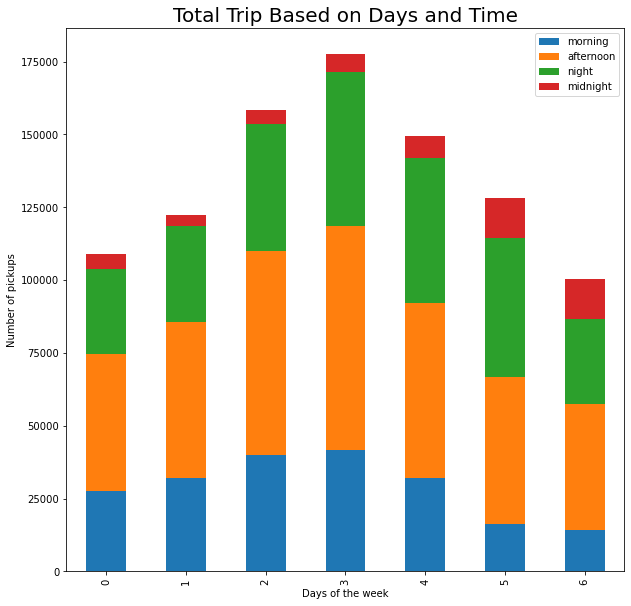

In [79]:
time = df_new[['pickup_hour','dropoff_hour']]
time['pickup_day'] = df_new[['pickup_day_no']]
time['dropoff_day'] = df_new[['dropoff_day_no']]
time['pickup_month'] = df_new[['pickup_month']]
time['dropoff_month'] = df_new[['dropoff_month']]

day_pickups = []
night_pickups = []
mid_night_pickups = []
afternoon_pickups = []

for i in range(0,7):
    day_pickups.append(time[(time.pickup_day == i) & (time.pickup_hour >= 6) & (time.pickup_hour < 12)].shape[0])
    night_pickups.append(time[(time.pickup_day == i) & (time.pickup_hour >= 18) & (time.pickup_hour <= 23)].shape[0])
    mid_night_pickups.append(time[(time.pickup_day == i) & (time.pickup_hour >= 0) & (time.pickup_hour < 6)].shape[0])
    afternoon_pickups.append(time[(time.pickup_day == i) & (time.pickup_hour >= 12) & (time.pickup_hour < 18)].shape[0])
    
days =pd.DataFrame({'morning':day_pickups, 'afternoon':afternoon_pickups, 'night':night_pickups, 'midnight':mid_night_pickups})
days

days.plot(kind='bar', stacked=True,figsize=(10, 10))
plt.title('Total Trip Based on Days and Time', fontsize = 20)
plt.xlabel('Days of the week')
plt.ylabel('Number of pickups')
plt.tick_params(axis='both', which='minor')
plt.plot()
#plt.xticks(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for i in range(0,len(days)):
    print ("{} -  morning:{} , day:{} , mid-day:{} night:{}".format(days[i],mid_night_pickups[i],day_pickups[i],afternoon_pickups[i],night_pickups[i]))

<AxesSubplot:title={'center':'Pickup Time Distribution'}, xlabel='pickup_timeofday', ylabel='count'>

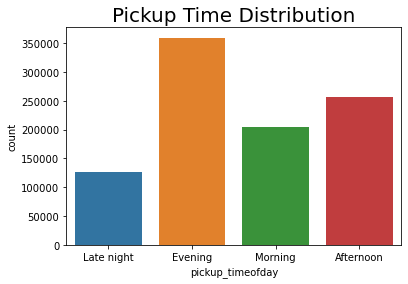

In [80]:
plt.title('Pickup Time Distribution',fontsize=20)
sns.countplot(x='pickup_timeofday', data=df_new)

<AxesSubplot:title={'center':'Dropoff Time Distribution'}, xlabel='dropoff_timeofday', ylabel='count'>

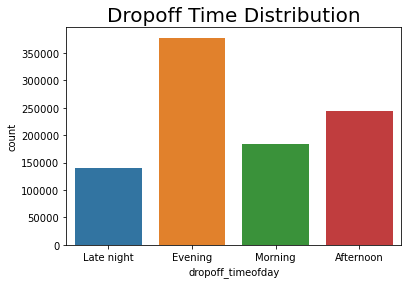

In [81]:
plt.title('Dropoff Time Distribution', fontsize=20)
sns.countplot(x='dropoff_timeofday', data=df_new)

<AxesSubplot:title={'center':'Pickup Location Distribution'}, xlabel='pickup_loc', ylabel='count'>

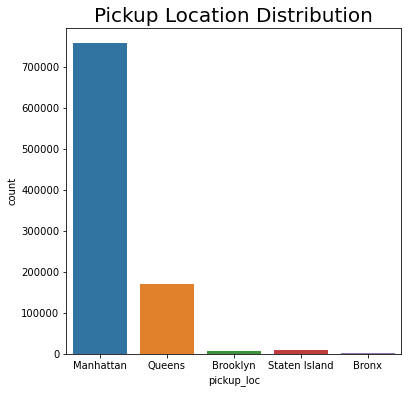

In [82]:
plt.figure(figsize = (6,6))
plt.title('Pickup Location Distribution',fontsize=20)
sns.countplot(x='pickup_loc', data=df_new)

<AxesSubplot:title={'center':'Dropoff Location Distribution'}, xlabel='dropoff_loc', ylabel='count'>

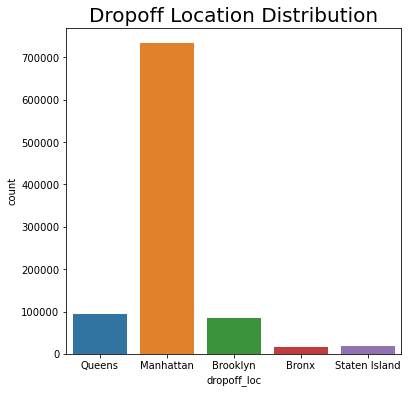

In [83]:
plt.figure(figsize = (6,6))
plt.title('Dropoff Location Distribution',fontsize=20)
sns.countplot(x='dropoff_loc', data=df_new)

### Fare Amount Analysis

<AxesSubplot:xlabel='pickup_loc', ylabel='fare_amount'>

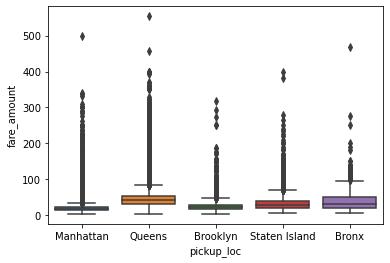

In [84]:
sns.boxplot(data=df_new, x='pickup_loc', y='fare_amount')

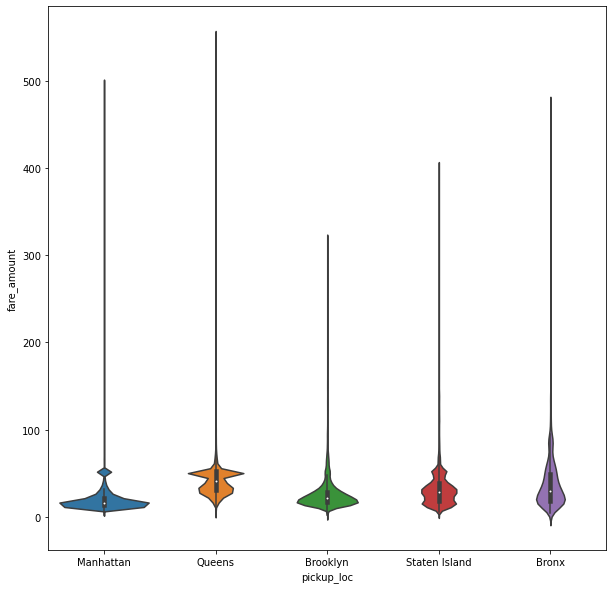

In [85]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.violinplot(data=df_new, x='pickup_loc', y='fare_amount')
plt.show()

In [86]:
df_Manhattan = df_new[df_new['pickup_loc']=='Manhattan']
df_Queens = df_new[df_new['pickup_loc']=='Queens']
df_Brooklyn = df_new[df_new['pickup_loc']=='Brooklyn']
df_Staten_Island = df_new[df_new['pickup_loc']=='Staten Island']
df_Bronx = df_new[df_new['pickup_loc']=='Bronx']

### Fare Amount x Trip Duration

<AxesSubplot:xlabel='trip_duration_1', ylabel='fare_amount'>

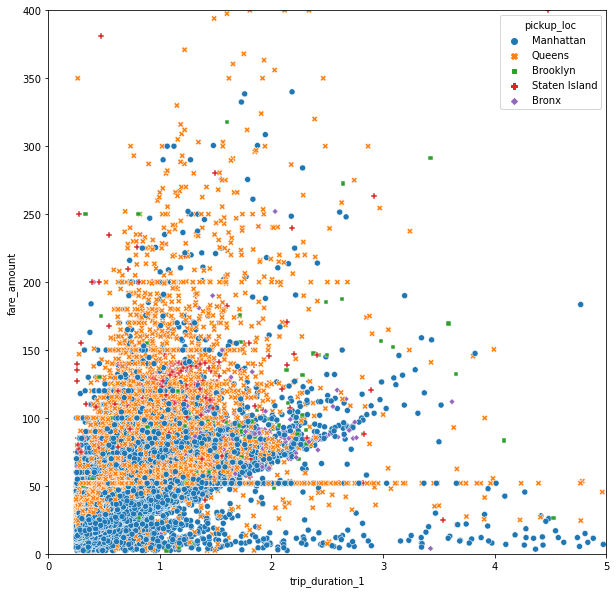

In [87]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0,5), ylim=(0,400))
sns.scatterplot(data=df_new, x='trip_duration_1', y='fare_amount', hue='pickup_loc', style='pickup_loc')

<AxesSubplot:xlabel='trip_duration_1', ylabel='fare_amount'>

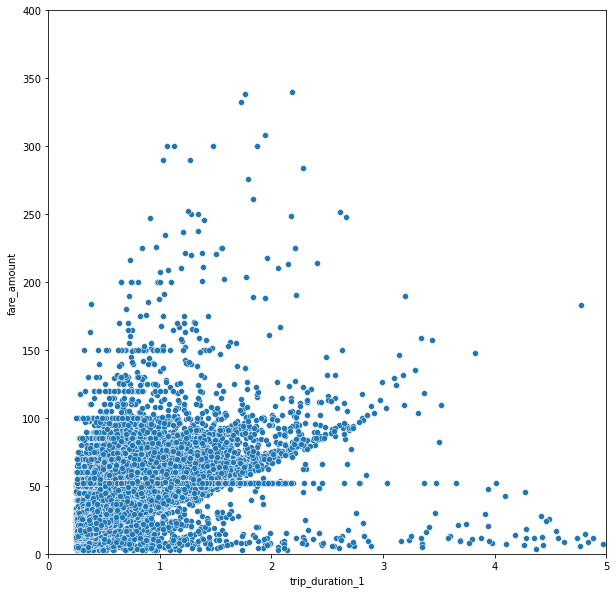

In [88]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0,5), ylim=(0,400))
sns.scatterplot(data=df_Manhattan, x='trip_duration_1', y='fare_amount')

<AxesSubplot:xlabel='trip_duration_1', ylabel='fare_amount'>

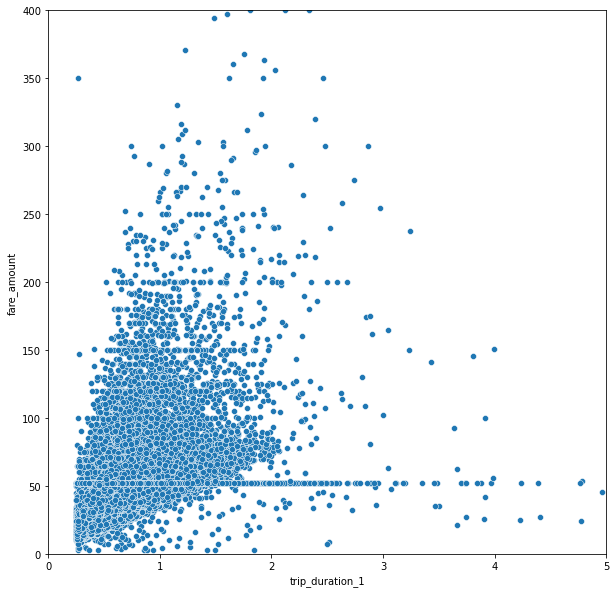

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0,5), ylim=(0,400))
sns.scatterplot(data=df_Queens, x='trip_duration_1', y='fare_amount')

<AxesSubplot:xlabel='trip_duration_1', ylabel='fare_amount'>

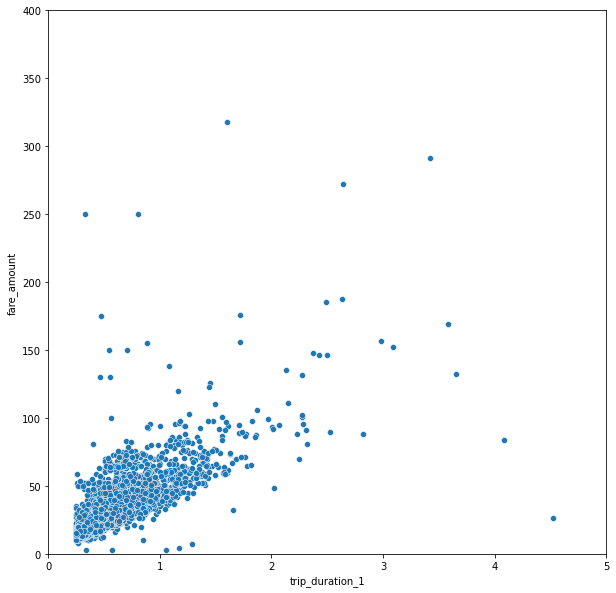

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0,5), ylim=(0,400))
sns.scatterplot(data=df_Brooklyn, x='trip_duration_1', y='fare_amount')

<AxesSubplot:xlabel='trip_duration_1', ylabel='fare_amount'>

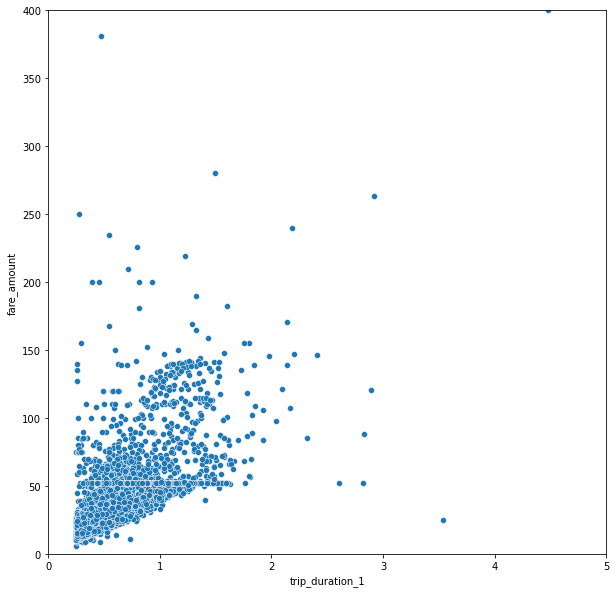

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0,5), ylim=(0,400))
sns.scatterplot(data=df_Staten_Island, x='trip_duration_1', y='fare_amount')

<AxesSubplot:xlabel='trip_duration_1', ylabel='fare_amount'>

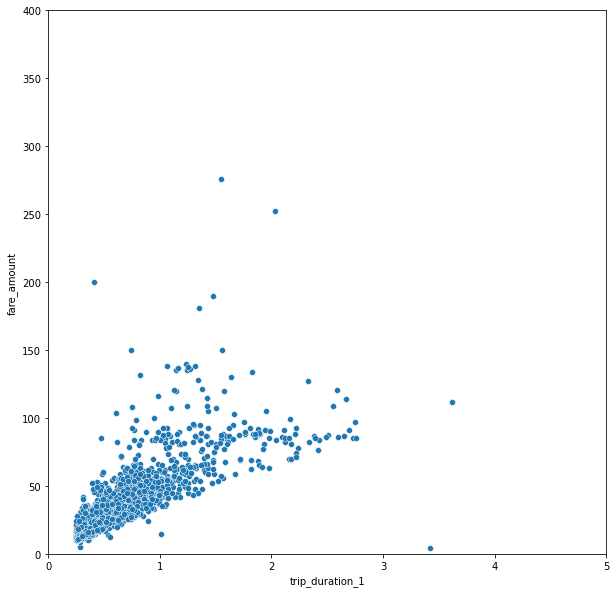

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0,5), ylim=(0,400))
sns.scatterplot(data=df_Bronx, x='trip_duration_1', y='fare_amount')

### Fare Amount x Trip Distance

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

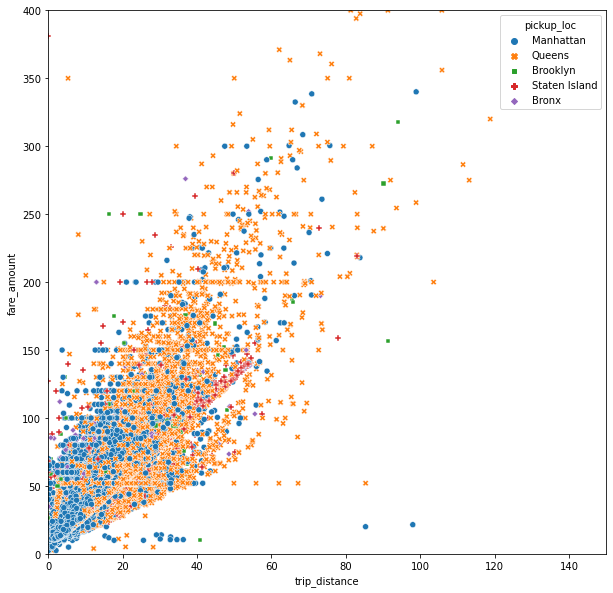

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0,150), ylim=(0,400))
sns.scatterplot(data=df_new, x='trip_distance', y='fare_amount', hue='pickup_loc', style='pickup_loc')

### Trip Distance x Trip Duration

<AxesSubplot:xlabel='trip_duration_1', ylabel='trip_distance'>

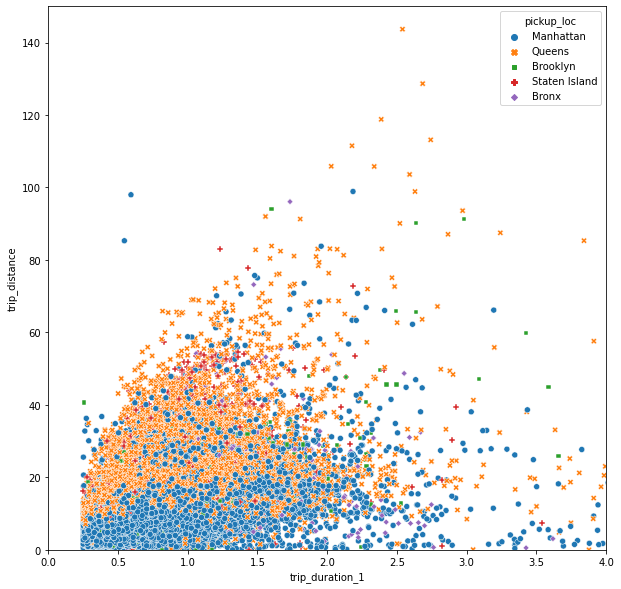

In [94]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0,4), ylim=(0,150))
sns.scatterplot(data=df_new, x='trip_duration_1', y='trip_distance', hue='pickup_loc', style='pickup_loc')

<AxesSubplot:xlabel='pickup_loc', ylabel='trip_distance'>

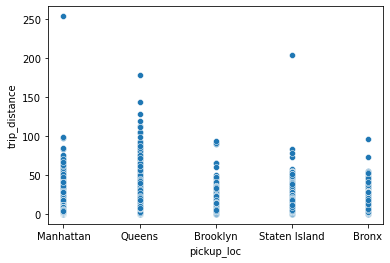

In [95]:
sns.scatterplot(data=df_new, x='pickup_loc', y='trip_distance')

### Histogram

<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

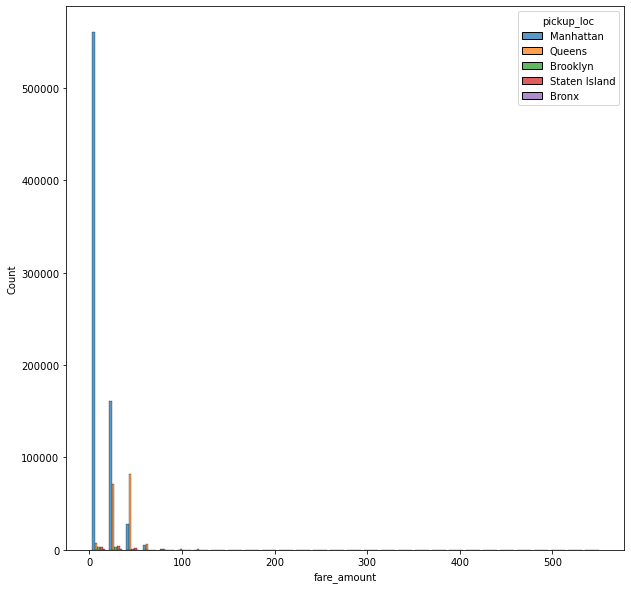

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=df_new, x="fare_amount", hue='pickup_loc', bins=30, multiple="dodge", shrink=.8)

### Analisis per Borough

In [118]:
df_baru = pd.get_dummies(data=df_new, columns=['pickup_loc'])
df_baru

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,...,dropoff_month,pickup_timeofday,dropoff_timeofday,dropoff_loc,trip_duration_1,pickup_loc_Bronx,pickup_loc_Brooklyn,pickup_loc_Manhattan,pickup_loc_Queens,pickup_loc_Staten Island
3,1,2.0,6.50,1.0,N,2,21.0,3.0,0.5,0.00,...,9,Late night,Late night,Queens,0.305278,0,0,1,0,0
6,1,1.0,7.60,1.0,N,1,25.5,3.0,0.5,5.85,...,9,Late night,Late night,Manhattan,0.372222,0,0,1,0,0
8,1,1.0,11.20,1.0,N,1,33.5,3.0,0.5,10.95,...,9,Late night,Late night,Manhattan,0.457778,0,0,0,1,0
9,2,1.0,5.53,1.0,N,2,20.5,0.5,0.5,0.00,...,9,Late night,Late night,Brooklyn,0.379444,0,0,1,0,0
10,2,1.0,6.14,1.0,N,1,21.5,0.5,0.5,4.56,...,9,Late night,Late night,Brooklyn,0.420833,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820911,1,1.0,6.50,1.0,N,2,22.5,3.0,0.5,0.00,...,10,Late night,Late night,Manhattan,0.424444,0,0,1,0,0
2820922,1,1.0,5.00,1.0,N,1,21.0,3.0,0.5,4.95,...,9,Late night,Late night,Brooklyn,0.470833,0,0,1,0,0
2820925,2,1.0,5.36,1.0,N,1,17.5,0.5,0.5,4.26,...,10,Late night,Late night,Manhattan,0.287778,0,0,1,0,0
2820935,2,1.0,4.80,1.0,N,1,17.0,0.5,0.5,2.20,...,10,Late night,Late night,Manhattan,0.330278,0,0,1,0,0


In [130]:
df_baru['pickup_loc_Manhattan'].astype('category')
df_baru['pickup_loc_Queens'].astype('category')
df_baru['pickup_loc_Brooklyn'].astype('category')
df_baru['pickup_loc_Bronx'].astype('category')
df_baru['pickup_loc_Staten Island'].astype('category')

3          0
6          0
8          0
9          0
10         0
          ..
2820911    0
2820922    0
2820925    0
2820935    0
2820937    0
Name: pickup_loc_Staten Island, Length: 945560, dtype: category
Categories (2, uint64): [0, 1]

#### Fare Amount

<AxesSubplot:title={'center':'Fare Amount Manhattan'}, xlabel='[0, 1]', ylabel='fare_amount'>

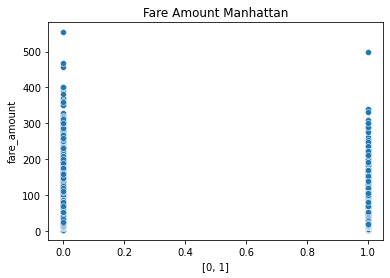

In [136]:
# Manhattan
plt.title('Fare Amount Manhattan')
plt.xlabel([0,1])
sns.scatterplot(data=df_baru, x = 'pickup_loc_Manhattan', y = 'fare_amount')

<AxesSubplot:title={'center':'Fare Amount Queens'}, xlabel='[0, 1]', ylabel='fare_amount'>

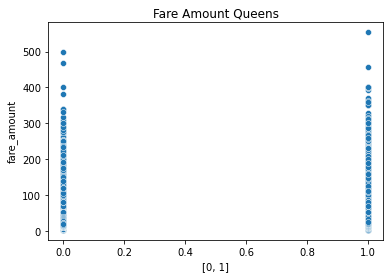

In [137]:
# Queens
plt.title('Fare Amount Queens')
plt.xlabel([0,1])
sns.scatterplot(data=df_baru, x = 'pickup_loc_Queens', y = 'fare_amount')

<AxesSubplot:title={'center':'Fare Amount Brooklyn'}, xlabel='[0, 1]', ylabel='fare_amount'>

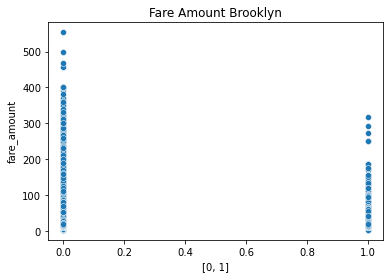

In [138]:
# Brooklyn
plt.title('Fare Amount Brooklyn')
plt.xlabel([0,1])
sns.scatterplot(data=df_baru, x = 'pickup_loc_Brooklyn', y = 'fare_amount')

<AxesSubplot:title={'center':'Fare Amount Bronx'}, xlabel='[0, 1]', ylabel='fare_amount'>

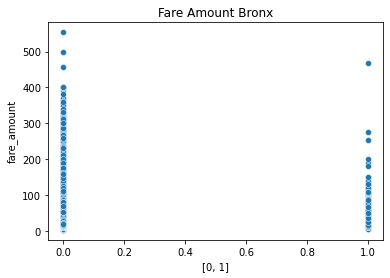

In [139]:
# Bronx
plt.title('Fare Amount Bronx')
plt.xlabel([0,1])
sns.scatterplot(data=df_baru, x = 'pickup_loc_Bronx', y = 'fare_amount')

<AxesSubplot:title={'center':'Fare Amount Staten Island'}, xlabel='{0, 1}', ylabel='fare_amount'>

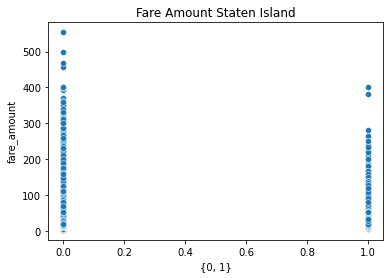

In [155]:
# Staten Island
plt.title('Fare Amount Staten Island')
plt.xlabel({0,1})
sns.scatterplot(data=df_baru, x = 'pickup_loc_Staten Island', y = 'fare_amount')

#### Trip Duration

<AxesSubplot:title={'center':'Trip Duration Manhattan'}, xlabel='pickup_loc_Manhattan', ylabel='trip_duration_1'>

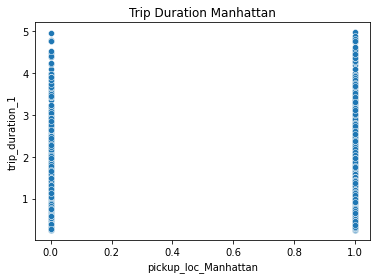

In [141]:
# Manhattan
plt.title('Trip Duration Manhattan')
sns.scatterplot(data=df_baru, x = 'pickup_loc_Manhattan', y = 'trip_duration_1')

<AxesSubplot:title={'center':'Trip Duration Queens'}, xlabel='pickup_loc_Queens', ylabel='trip_duration_1'>

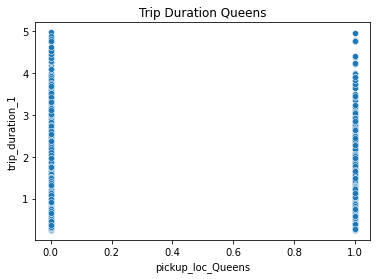

In [142]:
# Queens
plt.title('Trip Duration Queens')
sns.scatterplot(data=df_baru, x = 'pickup_loc_Queens', y = 'trip_duration_1')

<AxesSubplot:title={'center':'Trip Duration Brooklyn'}, xlabel='pickup_loc_Brooklyn', ylabel='trip_duration_1'>

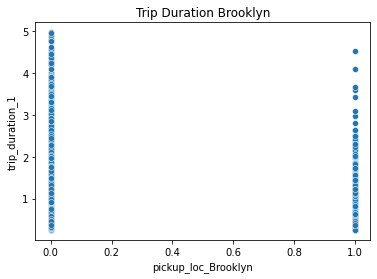

In [144]:
# Brooklyn
plt.title('Trip Duration Brooklyn')
sns.scatterplot(data=df_baru, x = 'pickup_loc_Brooklyn', y = 'trip_duration_1')

<AxesSubplot:title={'center':'Trip Duration Bronx'}, xlabel='pickup_loc_Bronx', ylabel='trip_duration_1'>

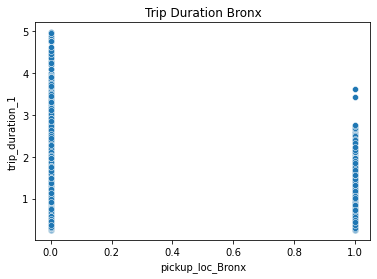

In [145]:
# Bronx
plt.title('Trip Duration Bronx')
sns.scatterplot(data=df_baru, x = 'pickup_loc_Bronx', y = 'trip_duration_1')

<AxesSubplot:title={'center':'Trip Duration Staten Island'}, xlabel='pickup_loc_Staten Island', ylabel='trip_duration_1'>

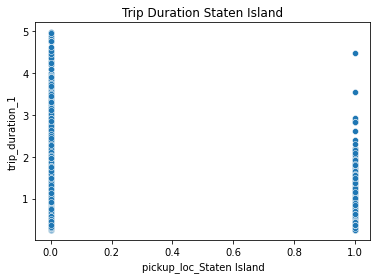

In [146]:
# Staten Island
plt.title('Trip Duration Staten Island')
sns.scatterplot(data=df_baru, x = 'pickup_loc_Staten Island', y = 'trip_duration_1')

##### Trip DIstance

<AxesSubplot:title={'center':'Trip Distance Manhattan'}, xlabel='pickup_loc_Manhattan', ylabel='trip_distance'>

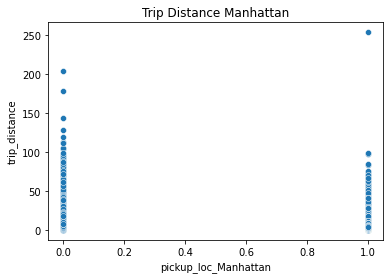

In [147]:
# Manhattan
plt.title('Trip Distance Manhattan')
sns.scatterplot(data=df_baru, x = 'pickup_loc_Manhattan', y = 'trip_distance')

<AxesSubplot:title={'center':'Trip Distance Queens'}, xlabel='pickup_loc_Queens', ylabel='trip_distance'>

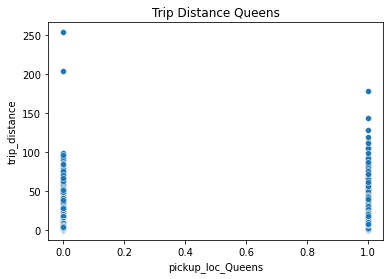

In [149]:
# Queens
plt.title('Trip Distance Queens')
sns.scatterplot(data=df_baru, x = 'pickup_loc_Queens', y = 'trip_distance')

<AxesSubplot:title={'center':'Trip Distance Brooklyn'}, xlabel='pickup_loc_Brooklyn', ylabel='trip_distance'>

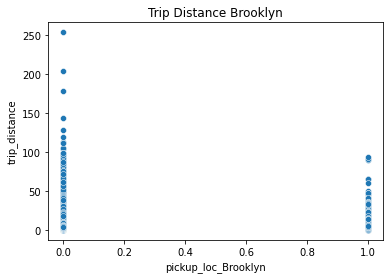

In [150]:
# Brooklyn
plt.title('Trip Distance Brooklyn')
sns.scatterplot(data=df_baru, x = 'pickup_loc_Brooklyn', y = 'trip_distance')

<AxesSubplot:title={'center':'Trip Distance Bronx'}, xlabel='pickup_loc_Bronx', ylabel='trip_distance'>

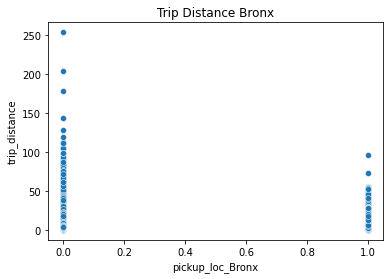

In [151]:
# Bronx
plt.title('Trip Distance Bronx')
sns.scatterplot(data=df_baru, x = 'pickup_loc_Bronx', y = 'trip_distance')

<AxesSubplot:title={'center':'Trip Distance State Island'}, xlabel='pickup_loc_Staten Island', ylabel='trip_distance'>

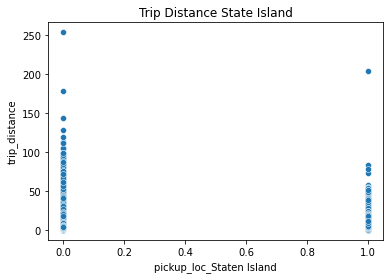

In [153]:
# Staten Island
plt.title('Trip Distance State Island')
sns.scatterplot(data=df_baru, x = 'pickup_loc_Staten Island', y = 'trip_distance')

# Model Machine Learning : Prediksi Fare Amount

In [98]:
df_new.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_day', 'dropoff_day',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday', 'pickup_loc', 'dropoff_loc', 'trip_duration_1'],
      dtype='object')

In [99]:
X = df_new.drop(columns=['VendorID', 'passenger_count', 'RatecodeID',
       'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra','mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_day', 'dropoff_day',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday', 'dropoff_loc','pickup_loc'])

X

,trip_distance,trip_duration_1
3,6.50,0.305278
6,7.60,0.372222
8,11.20,0.457778
9,5.53,0.379444
10,6.14,0.420833
...,...,...
2820911,6.50,0.424444
2820922,5.00,0.470833
2820925,5.36,0.287778
2820935,4.80,0.330278


In [100]:
y = df_new['fare_amount']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [102]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [103]:
lr.fit(X_train, y_train)

LinearRegression()

In [104]:
c = lr.intercept_
c

3.8768024262330663

In [105]:
m = lr.coef_
m

array([ 2.15316751, 13.53430979])

In [106]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([35.10602114, 15.49302675, 11.10532812, ..., 12.76702663,
       12.75676756, 12.68226395])

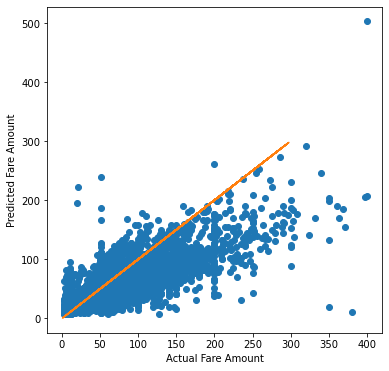

In [162]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(y_train, y_pred_train,'o')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')

m, b = np.polyfit(x, y, deg=1)

plt.plot(x, m*x+b)

In [108]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.9039347906815353

In [109]:
y_pred_test = lr.predict(X_test)

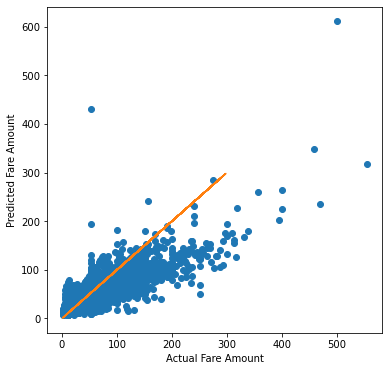

In [164]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.plot(y_test, y_pred_test,'o')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')

m, b = np.polyfit(x, y, deg=1)

plt.plot(x, m*x+b)

In [111]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.902943558368606

In [112]:
df_new

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,...,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,pickup_loc,dropoff_loc,trip_duration_1
3,1,2.0,6.50,1.0,N,2,21.0,3.0,0.5,0.00,...,2,0,0,9,9,Late night,Late night,Manhattan,Queens,0.305278
6,1,1.0,7.60,1.0,N,1,25.5,3.0,0.5,5.85,...,2,0,0,9,9,Late night,Late night,Manhattan,Manhattan,0.372222
8,1,1.0,11.20,1.0,N,1,33.5,3.0,0.5,10.95,...,2,0,0,9,9,Late night,Late night,Queens,Manhattan,0.457778
9,2,1.0,5.53,1.0,N,2,20.5,0.5,0.5,0.00,...,2,0,1,9,9,Late night,Late night,Manhattan,Brooklyn,0.379444
10,2,1.0,6.14,1.0,N,1,21.5,0.5,0.5,4.56,...,2,0,1,9,9,Late night,Late night,Brooklyn,Brooklyn,0.420833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820911,1,1.0,6.50,1.0,N,2,22.5,3.0,0.5,0.00,...,4,23,0,9,10,Late night,Late night,Manhattan,Manhattan,0.424444
2820922,1,1.0,5.00,1.0,N,1,21.0,3.0,0.5,4.95,...,3,23,23,9,9,Late night,Late night,Manhattan,Brooklyn,0.470833
2820925,2,1.0,5.36,1.0,N,1,17.5,0.5,0.5,4.26,...,4,23,0,9,10,Late night,Late night,Manhattan,Manhattan,0.287778
2820935,2,1.0,4.80,1.0,N,1,17.0,0.5,0.5,2.20,...,4,23,0,9,10,Late night,Late night,Manhattan,Manhattan,0.330278
